# In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and color each data point with specific class.

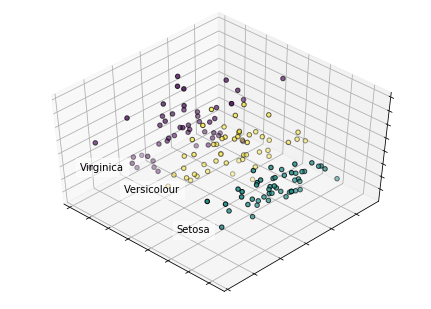

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets


iris = datasets.load_iris()
features = iris.data
labels = iris.target

pca = decomposition.PCA(n_components=3)
pca.fit(features)
features = pca.transform(features)

plt.clf()

fig = plt.figure(1, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()


for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(
        features[labels == label, 0].mean(),
        features[labels == label, 1].mean() + 1.5,
        features[labels == label, 2].mean(), name,
        horizontalalignment='center',
        bbox=dict(alpha=0.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
labels = np.choose(labels, [1, 2, 0]).astype(np.float)
ax.scatter(features[:, 0], features[:, 1], features[:, 2], c=labels, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
